In [4]:
import pandas as pd
import matplotlib.pyplot as plt

albumi = pd.read_csv('tabela.csv', index_col = 'id')
zanri = pd.read_csv('zanri.csv')
pd.options.display.max_rows = 15

%matplotlib inline

pd.set_option('display.mpl_style', 'default') 
plt.rcParams['figure.figsize'] = (15, 5)

C:\Users\metodjazbec\User\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Zajete podatke sem zbral v spodnji tabeli. 

In [5]:
albumi

,naslov,avtor,ocena_kritikov,leto,ocena_ljudi
id,,,,,
1,Ten Freedom Summers,Wadada Leo Smith,99,2012,50
2,SMiLE,Brian Wilson,97,2004,80
3,Van Lear Rose,Loretta Lynn,97,2004,87
4,To Pimp A Butterfly,Kendrick Lamar,96,2015,90
5,Histoire de Melody Nelson,Serge Gainsbourg,96,2009,87
6,Stankonia,Outkast,95,2000,89
7,Black Messiah,D'Angelo,95,2014,87
...,...,...,...,...,...
1393,Wild Mountain Nation,Blitzen Trapper,82,2007,83


Svojim podatkom bom dodal še en stolpec 'razlika'. V njem bom izračunal razliko med oceno kritikov in poslušalcev. Na ta način bom kasneje lahko primerjal, pri katerih albumih je prišlo do največjih razlik. 

In [3]:
albumi['razlika'] = albumi['ocena_kritikov'] - albumi['ocena_ljudi']
albumi[abs(albumi.razlika) > 20].sort_values('razlika', ascending=False)[:15]

,naslov,avtor,ocena_kritikov,leto,ocena_ljudi,razlika
id,,,,,,
106,Upland Stories,Robbie Fulks,87,2016,37,50
1,Ten Freedom Summers,Wadada Leo Smith,99,2012,50,49
14,My Dusty Road,Woody Guthrie,93,2009,50,43
1217,The Narrows,Grant-Lee Philips,83,2016,40,43
60,The Fade in Time,Sam Lee,89,2015,51,38
74,From Kinshasa,Mbongwana Star,88,2015,52,36
258,Eric Bachmann,Eric Bachmann,81,2016,46,35
878,Without a Net,Wayne Shorter,86,2013,53,33
43,Jama Ko,Bassekou Kouyate & Ngoni Ba,90,2013,60,30


Sedaj lahko na hitro pogledamo koliko albumov so kritiki ocenili z višjo oceno kot poslušalci in kakšna je bila povprečna razlika obeh ocen. 

In [12]:
len(albumi[albumi.razlika > 0])

546

In [14]:
sum(abs(albumi['razlika'])) / 1380

5

Oglejmo si povprečno oceno poslušalcev po letih in prikažimo to v grafu.

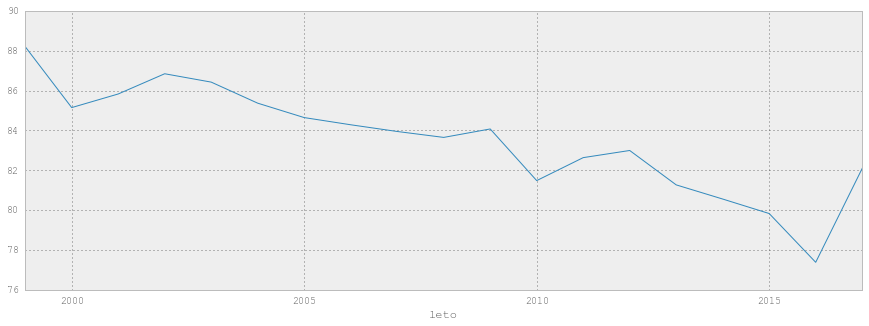

In [15]:
albumi_po_letih = albumi.groupby('leto')
albumi_po_letih['ocena_ljudi'].mean().plot()

Da bomo preverili verodostojnost teh podatkov poglejmo še koliko albumov je bilo posnetih v posameznem letu. 

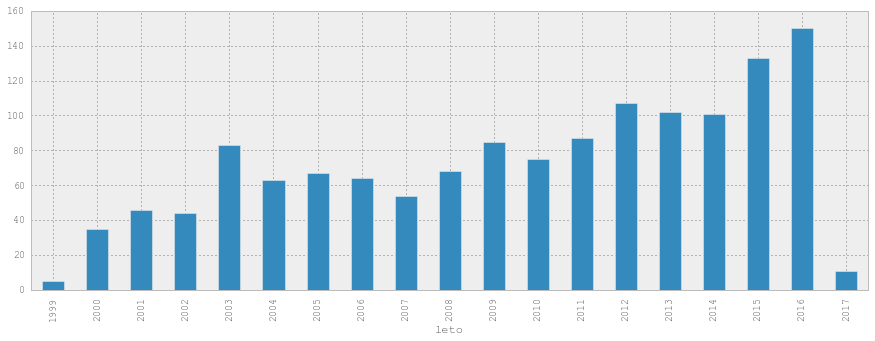

In [30]:
albumi_po_letih.count()['naslov'].plot(kind='bar')

Iz zgornjega grafa vidimo, da je lahko visoka ocena albumov iz začetka tisočletja povezana tudi s tem, da je v zajeti bazi podatkov majhno število albumov iz tega obdobja.

Oglejmo si najbolj popularne avtorje (tiste z največ albumi v naši podatkovni bazi).

In [44]:
albumi_po_avtorjih = albumi.groupby('avtor')
albumi_po_avtorjih.count()['naslov'].sort_values(ascending=False)[:15]

avtor
Spoon                          6
Low                            6
Sleater-Kinney                 5
Nas                            5
Various Artists                5
Bob Dylan                      5
Kanye West                     4
Sufjan Stevens                 4
Mount Eerie                    4
LCD Soundsystem                4
Thee Oh Sees                   4
Miranda Lambert                4
Godspeed You! Black Emperor    4
Elbow                          4
The Dillinger Escape Plan      4
Name: naslov, dtype: int64

Za lažjo analizo podatkov na podlagi žanrov sem si pripravil pomožno tabelo.

In [6]:
zanri

,id,zanr
0,1,Jazz
1,2,Rock
2,2,Pop
3,3,Country
4,4,Rap
5,5,Rock
6,5,Pop
...,...,...
4099,1399,Indie
4100,1399,Rock


Sedaj obe tabeli staknem...

In [8]:
zanri_ocene = pd.merge(zanri, albumi.reset_index(), left_on='id', right_on='id')
zanri_ocene

,id,zanr,naslov,avtor,ocena_kritikov,leto,ocena_ljudi
0,1,Jazz,Ten Freedom Summers,Wadada Leo Smith,99,2012,50
1,2,Rock,SMiLE,Brian Wilson,97,2004,80
2,2,Pop,SMiLE,Brian Wilson,97,2004,80
3,3,Country,Van Lear Rose,Loretta Lynn,97,2004,87
4,4,Rap,To Pimp A Butterfly,Kendrick Lamar,96,2015,90
5,5,Rock,Histoire de Melody Nelson,Serge Gainsbourg,96,2009,87
6,5,Pop,Histoire de Melody Nelson,Serge Gainsbourg,96,2009,87
...,...,...,...,...,...,...,...
4030,1398,...,Running out of Love,The Radio Dept.,82,2016,73
4031,1399,Alternative/Indie,Field Report,Field Report,82,2012,75


Najbolj pogosto zastopani žanri so prikazani spodaj.

In [31]:
zanri_ocene.groupby('zanr').count().sort_values('id', ascending=False)['id'][:15]


zanr
Rock                 849
Pop/Rock             631
Indie                381
Alternative/Indie    309
...                  299
Alternative          269
Electronic           198
Rap                  137
R&B                   83
Folk                  72
Country               71
Pop                   69
Metal                 62
Experimental          56
Jazz                  38
Name: id, dtype: int64

Tu pa so še najbolje ocenjeni žanri (po ocenah kritikov). Zaradi velikega nabora različnih žanrov sem upošteval le tiste z več kot 10 pojavitvami.

In [41]:
povprecje = zanri_ocene.groupby('zanr').mean()['ocena_kritikov'].to_frame()
pogostost = zanri_ocene.groupby('zanr').count()['id'].to_frame()

pomozni = pd.merge(povprecje.reset_index(), pogostost.reset_index(), left_on='zanr', right_on='zanr')
pomozni = pomozni.set_index('zanr')
pomozni[pomozni.id > 10].sort_values('ocena_kritikov', ascending=False)['ocena_kritikov'][:15]

zanr
Soul            84.000000
Contemporary    83.642857
Alt-Country     83.600000
Pop             83.565217
Country         83.521127
Dance           83.400000
Rap             83.226277
R&B             83.132530
Avant-Garde     83.058824
Folk            83.041667
Heavy           83.035714
Jazz            82.973684
Electronic      82.742424
Americana       82.714286
Metal           82.661290
Name: ocena_kritikov, dtype: float64

Na koncu sem pripravil še funkcijo, s pomočjo katere lahko uporabnik analizira glasbene trende od leta 1999 naprej, tj. funkcija vrne najbolj pogosto zastopane žanre v posameznem letu.

In [68]:
def najbolj_pogosti(letnica, stevilo=3):
    if letnica < 1999 or letnica > 2017:
        return 'Podatki niso na voljo'
    return zanri_ocene[zanri_ocene.leto == letnica].groupby('zanr').count().sort_values('id', ascending=False)['id'][:stevilo]

In [77]:
najbolj_pogosti(2016)

zanr
Pop/Rock             115
Rock                  67
Alternative/Indie     53
Name: id, dtype: int64